In [168]:
ExpandNCM[(h : NonCommutativeMultiply)[a___, b_Plus, c___]] := 
 Distribute[h[a, b, c], Plus, h, Plus, ExpandNCM[h[##]] &]
ExpandNCM[(h : NonCommutativeMultiply)[a___, b_Times, c___]] := 
 Most[b] ExpandNCM[
   h[a, Last[b], c]] (* last must be a noncommutative variable *)

ExpandNCM[a_] := ExpandAll[a]
ExpandNCM[Plus[a_, b__]] := ExpandNCM[a] + ExpandNCM[Plus[b]];
ExpandNCM[Times[a_, b__]] := Expand[ExpandNCM[a] ExpandNCM[Times[b]]];

Unprotect[NonCommutativeMultiply];
ClearAll[NonCommutativeMultiply]; 
SetAttributes[NonCommutativeMultiply, OneIdentity];
NonCommutativeMultiply[a_] := a;
NonCommutativeMultiply[a___, x_?NumericQ, b___] := x a ** b;
SetAttributes[NonCommutativeMultiply, Flat];
NonCommutativeMultiply[a___, x^c_., x^d_., b___] := 
  a ** x^(c + d) ** b;
NonCommutativeMultiply[a___, y^c_., y^d_., b___] := 
  a ** y^(c + d) ** b;
  
XYtoZ[Times[a_, b__]] := Expand[XYtoZ[a] XYtoZ[Times[b]]];
XYtoZ[Plus[a_, b__]] := XYtoZ[a] + XYtoZ[Plus[b]];
XYtoZ[NonCommutativeMultiply[x^a_., y^b_., c___]] := 
  Subscript[z, a + 1] ** XYtoZ[y^(b - 1) ** c];
XYtoZ[NonCommutativeMultiply[y^b_., c___]] := 
  Subscript[z, 1] ** XYtoZ[y^(b - 1) ** c];
XYtoZ[y^b_.] := Subscript[z, 1] ** XYtoZ[y^(b - 1)];
XYtoZ[a_] := a;
ZtoXY[a_] := a /. Subscript[z, p_] -> x^(p - 1) ** y;

Harmonic[NonCommutativeMultiply[Subscript[z, p_], a__] | Subscript[z, 
    p_], NonCommutativeMultiply[Subscript[z, q_], b__] | Subscript[z, 
    q_]] := Subscript[z, p] ** (Harmonic[a, Subscript[z, q] ** b]) + 
   Subscript[z, q] ** (Harmonic[Subscript[z, p] ** a, b]) + 
   Subscript[z, p + q] ** (Harmonic[a, b]);
Harmonic[a_] := a;
Harmonic[] = 1;

Shuffle[NonCommutativeMultiply[x_Symbol^a_., c___] | x_Symbol^a_., 
   NonCommutativeMultiply[y_Symbol^b_., d___] | y_Symbol^b_.] := 
  x ** (Shuffle[x^(a - 1) ** c, y^b ** d]) + 
   y ** (Shuffle[x^a ** c, y^(b - 1) ** d]);
Shuffle[Times[x_Symbol^a_., c___] | x_Symbol^a_., 
    Times[y_Symbol^b_., d___] | y_Symbol^b_.] := d*c*Shuffle[x^a,y^b];

Shuffle[a_] := a;
Shuffle[a_?NumericQ, b_] := a b;
Shuffle[a_, b_?NumericQ] := a b;
Shuffle[] = 1;

Regsha[Times[a_, b__]] := Expand[Regsha[a] Regsha[Times[b]]];
Regsha[Plus[a_, b__]] := Regsha[a] + Regsha[Plus[b]];
Regsha[NonCommutativeMultiply[y^b_., x^a_., c___]] := (-1)^b x ** 
    Shuffle[y^b, x^(a - 1) ** c];
Regsha[a_] := a;

x ** z + y ** z + z ** x + z ** y
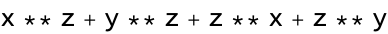

In [227]:
Distribute[Shuffle[x+y,az]]


Shuffle[x + y, z]
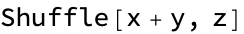

In [228]:
Shuffle[x+y,z]